In [8]:
import sklearn
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 4\delivery_time.csv")
data.head(6)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [11]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


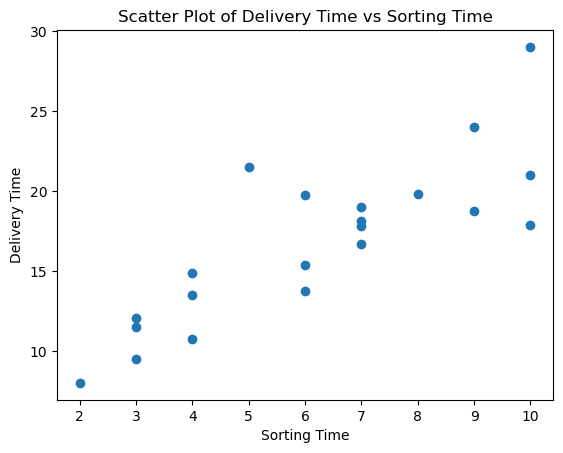

In [12]:
plt.scatter(data['Sorting Time'], data['Delivery Time'])
plt.title('Scatter Plot of Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [13]:
delivery_time =data['Delivery Time']
sorting_time =data['Sorting Time']
model = smf.ols("delivery_time~sorting_time", data = data).fit()

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        00:06:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

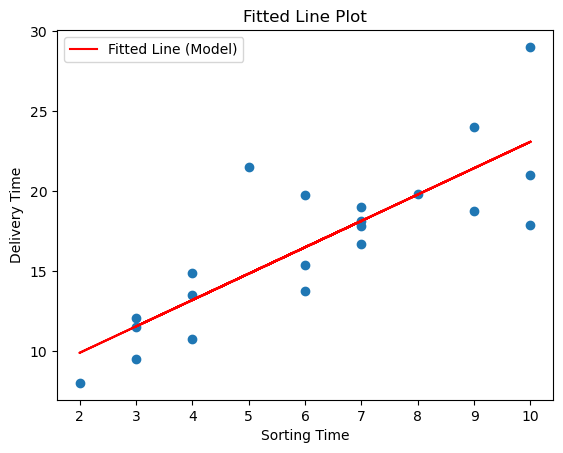

In [20]:
plt.scatter(data['Sorting Time'], data['Delivery Time'])
plt.plot(data['Sorting Time'], model.fittedvalues, color='red', label='Fitted Line (Model)')
plt.title('Fitted Line Plot')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

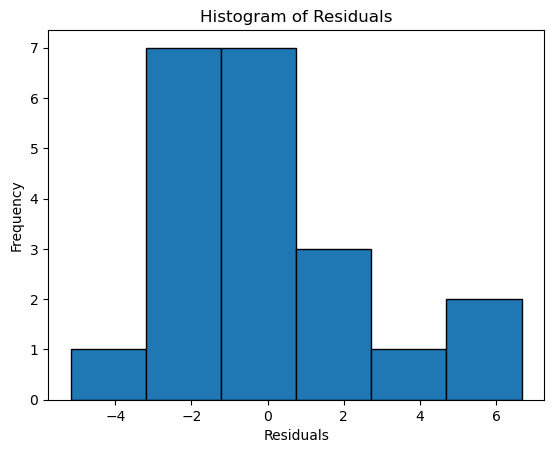

In [22]:
plt.hist(model.resid, bins='auto', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [16]:
model1 = smf.ols("delivery_time~np.log(sorting_time)", data = data).fit()

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        00:06:30   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2 = smf.ols("np.log(delivery_time)~sorting_time", data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           1.59e-06
Time:                           00:06:34   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model3 = smf.ols("np.log(delivery_time)~sorting_time+pow(sorting_time,2)+pow(sorting_time,3)", data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.782
Model:                               OLS   Adj. R-squared:                  0.743
Method:                    Least Squares   F-statistic:                     20.31
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           7.37e-06
Time:                           00:06:34   Log-Likelihood:                 10.748
No. Observations:                     21   AIC:                            -13.50
Df Residuals:                         17   BIC:                            -9.317
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0716      0.591      1.814      0.087      -0.175       2.318
sorting_time             0.6495      0.343      1.896      0.075      -0.073       1.372
pow(sorting_time, 2)    -0.0809      0.059     -1.361      0.191      -0.206       0.045
pow(sorting_time, 3)     0.0036      0.003      1.151      0.266      -0.003       0.010
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.371
Skew:                           0.260   Prob(JB):                        0.831
Kurtosis:                       2.608   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""